In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
housing = pd.read_csv('datasets/housing_prices/train.csv')

In [99]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing.info()
### 1460 rows, 81 cols

In [ ]:
housing.describe()

In [100]:
housing['Alley'].value_counts()
## change nulls for 'NA' and treat it as a new type of val

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [101]:
missing_val_count_by_column = (housing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(housing['LotArea'])
plt.show()

In [102]:
cat_columns = housing.select_dtypes(include='object').columns
num_columns = housing.select_dtypes(exclude='object').columns

In [103]:
cat_columns.shape

(43,)

In [104]:
num_columns.shape

(38,)

### Problems to solve:
1. Categorical encodings: what's the best strategy?
2. Missing value imputation: just the mean?

## Missing values

In [105]:
##################
## in cat cols
##################
missing_val_count_by_column = (housing[cat_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [106]:
##################
## in num cols
##################
missing_val_count_by_column = (housing[num_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [107]:
housing[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


#### Imputing MasVnrArea

In [108]:
housing['MasVnrArea'].head(10)
### most vals are zero

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
5      0.0
6    186.0
7    240.0
8      0.0
9      0.0
Name: MasVnrArea, dtype: float64

In [109]:
indices = housing[housing['MasVnrArea'].isnull()].index

In [110]:
housing['MasVnrArea'].mode()

0    0.0
dtype: float64

In [111]:
for idx in indices:
    housing.at[idx, 'MasVnrArea'] = 0.0

#### Imputing LotFrontage

In [112]:
### 259 rows. Is it sensible to impute using mean or median?
### won't it affect training? wouldn't it be better to drop these rows instead?
from sklearn.impute import SimpleImputer

In [113]:
lotFrontageImputer = SimpleImputer(strategy='median')
lotFrontageImputer.fit(housing['LotFrontage'].values.reshape(-1, 1))
housing['LotFrontage'] = lotFrontageImputer.transform(housing['LotFrontage'].values.reshape(-1, 1))

#### Imputing GarageYrBlt

In [114]:
garageYrBltImputer = SimpleImputer(strategy='median')
garageYrBltImputer.fit(housing['GarageYrBlt'].values.reshape(-1, 1))
housing['GarageYrBlt'] = garageYrBltImputer.transform(housing['GarageYrBlt'].values.reshape(-1, 1))

In [115]:
### Do we still have missing vals in num cols?
missing_val_count_by_column = (housing[num_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### Let's impute cat cols

In [116]:
missing_val_count_by_column = (housing[cat_columns].isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
### 1460 is the total num of rows in training set
### some cols have missing vals, we have 3 options:
### 1) drop rows (cannot be done on test set)
### 2) drop cols (if and only if there are a lot of missing vals)
### 3) impute vals (if and only if there are not too many missing vals)

### We need to test different effects of
### 1) Using imputed vals while training
### 2) Dropping cols while training

#### Imputing Alley

In [117]:
housing['Alley'] = housing['Alley'].fillna('NA') # NAA: no alley access

#### Imputing MasVnrType

In [118]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [119]:
housing['MasVnrType'] = housing['MasVnrType'].fillna('NA')

#### Imputing BsmtQual

In [120]:
housing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [121]:
housing['BsmtQual'] = housing['BsmtQual'].fillna('NA') # NB: no basement - this assumes that in test set var looks same

#### Imputing BsmtCond

In [122]:
housing['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [123]:
housing['BsmtCond'] = housing['BsmtCond'].fillna('NA') # NB: no basement

#### Imputing BsmtExposure

In [124]:
housing['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [125]:
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('NA') # NB: no basement

#### Imputing BsmtFinType1

In [126]:
housing['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [127]:
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('NA') # NB: no basement

#### Imputing BsmtFinType2

In [128]:
housing['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [129]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('NA') # NB: no basement

#### Imputing Electrical

In [130]:
housing['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [131]:
## imputing the mode (to only one MV, btw!)
housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

#### Imputing FireplaceQu

In [132]:
housing['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [133]:
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('NA') # NF: no fireplace!

#### Imputing GarageType

In [134]:
housing['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [135]:
housing['GarageType'] = housing['GarageType'].fillna('NA') # NG: no garage

#### Imputing GarageFinish

In [136]:
housing['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [137]:
housing['GarageFinish'] = housing['GarageFinish'].fillna('NA') # NG: no garage

#### Imputing GarageQual

In [138]:
housing['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [139]:
housing['GarageQual'] = housing['GarageQual'].fillna('NA') # NG: no garage

#### Imputing GarageCond

In [140]:
housing['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [141]:
housing['GarageCond'] = housing['GarageCond'].fillna('NA') # NG: no garage

#### Imputing PoolQC

In [142]:
housing['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [143]:
#### 1453 rows w/o pool. Does it mean that row has no pool?
housing[housing['PoolArea'] > 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,69.0,19690,Pave,NA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [144]:
### Only 7 rows have PoolArea != 0, these are the same where there PoolQC is MV
housing[housing['PoolQC'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,69.0,19690,Pave,NA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [145]:
### impute with NP: no pool
housing['PoolQC'] = housing['PoolQC'].fillna('NA')

#### Imputing Fence

In [146]:
housing['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [147]:
housing['Fence'] = housing['Fence'].fillna('NA') # NF: no fence

#### Imputing MiscFeature

In [148]:
housing['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [149]:
housing['MiscFeature'] = housing['MiscFeature'].fillna('NA') # None: no other feature

In [150]:
### do we still have missing vals?
missing_val_count_by_column = (housing.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


### Now we can do some feature cleaning, engineering, viz, etc.

In [155]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [ ]:
housing.to_csv('datasets/housing_prices/noMVs_train.csv', index=False)

In [ ]:
#### TARGET VAR: SalePrice!

In [152]:
num_columns.shape

(38,)

#### Do num cols need scaling or any other type of conversion?

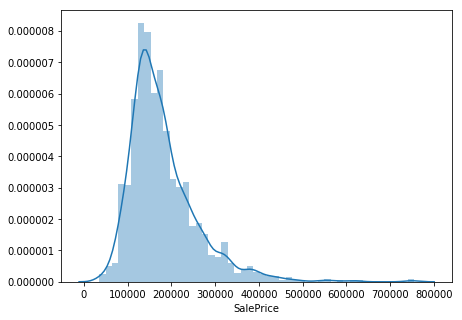

In [153]:
plt.figure(figsize=(7, 5))
sns.distplot(housing['SalePrice'])
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

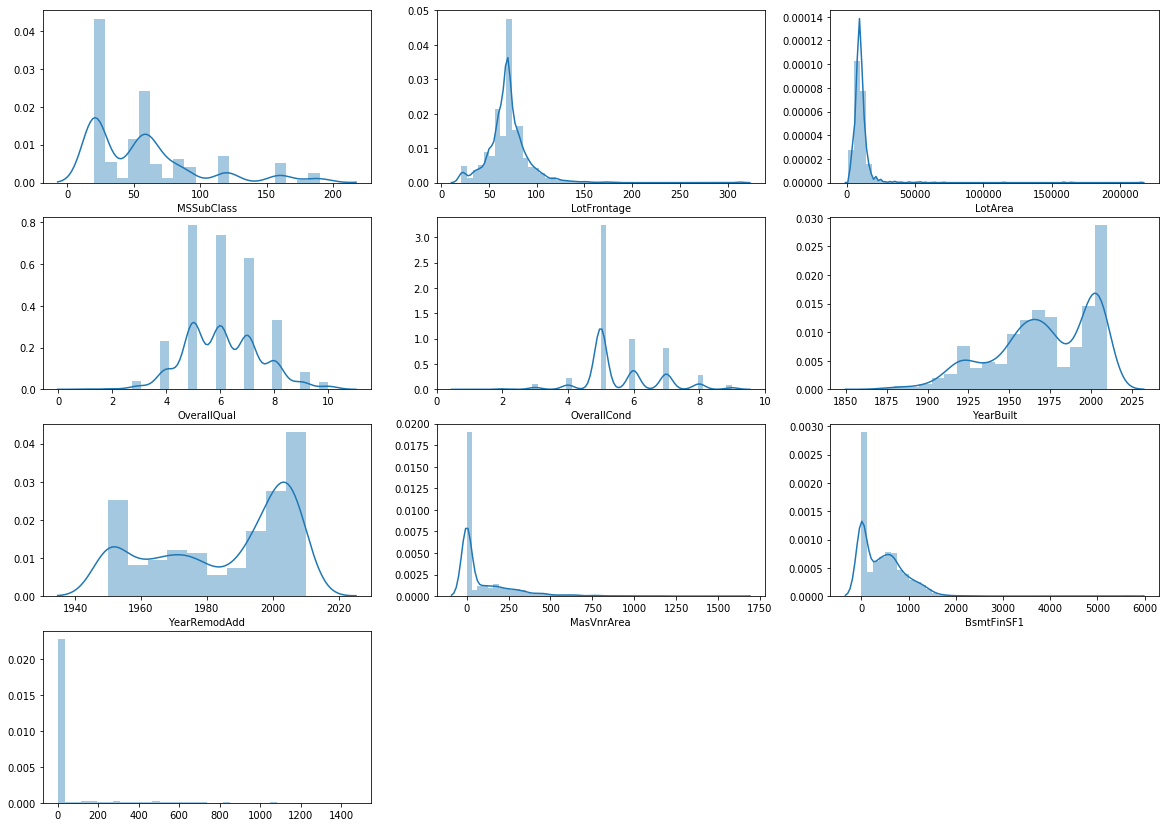

In [154]:
i = 1
plt.figure(figsize=(20, 45))
for col in num_columns:
    if col != 'Id' and col != 'SalePrice':
        plt.subplot(12, 3, i)
        sns.distplot(housing[col])
        i += 1
plt.show()

In [156]:
cols2scale = ['LotFrontage','LotArea',
              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
              'EnclosedPorch','3SsnPorch','ScreenPorch'
             ]
cols2labelencode = ['MSSubClass']

In [157]:
housing[['PoolArea']].describe()

,PoolArea
count,1460.000000
mean,2.758904
std,40.177307
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,738.000000


In [158]:
housing[housing['PoolArea'] > 0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NA,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NA,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NA,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NA,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NA,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NA,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NA,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NA,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NA,IR3,Bnk,AllPub,...,480,Gd,NA,NA,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NA,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,69.0,19690,Pave,NA,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NA,0,8,2006,WD,Alloca,274970


In [ ]:
### PoolArea has a peak at zero, which means that most houses dont have a pool
### This affects the distribution forming like an outlier.
### How should we scale it???
### Let's experiment w different scaling strategies

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [ ]:
housingScaler = MinMaxScaler()
housing['PoolArea_scaled'] = housingScaler.fit_transform(housing['PoolArea'].values.reshape(-1, 1))

In [160]:
### drop PoolArea and use instead PoolQC
unnecessary_cols = ['Id', 'PoolArea','MiscVal','ScreenPorch_scaled','PoolArea_scaled']

In [ ]:
plt.figure(figsize=(7, 5))
sns.distplot(housing[housing['ScreenPorch'] > 0]['ScreenPorch'])
plt.show()
### The plot below doesn't consider obs where screenporch = 0

In [ ]:
screenPorchScaler = MinMaxScaler()
housing['ScreenPorch_scaled'] = screenPorchScaler.fit_transform(housing['ScreenPorch'].values.reshape(-1, 1))

#### Let's have a look at cat cols now

In [161]:
cat_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
### one problem that we might encounter is that when we use get_dummies on training set
### we might come across values in cols in the test set that were not seen in the training
### set and thus get_dummies will yield a diff transformation

### one way to prevent this would be to use something like the countencoder

#### Let's encode cat cols using CountEncoder

In [162]:
from category_encoders import CountEncoder

In [163]:
countEncoder = CountEncoder()
housing[cat_columns] = countEncoder.fit_transform(housing[cat_columns])

In [164]:
housing[cat_columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1151,1454,1369,925,1311,1459,1052,1382,150,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
1,1151,1454,1369,925,1311,1459,47,1382,11,81,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
2,1151,1454,1369,484,1311,1459,1052,1382,150,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
3,1151,1454,1369,484,1311,1459,263,1382,51,1260,...,387,605,1311,1326,1340,1453,1179,1406,1267,101
4,1151,1454,1369,484,1311,1459,47,1382,41,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
5,1151,1454,1369,484,1311,1459,1052,1382,49,1260,...,870,605,1311,1326,1340,1453,157,49,1267,1198
6,1151,1454,1369,925,1311,1459,1052,1382,86,1260,...,870,422,1311,1326,1340,1453,1179,1406,1267,1198
7,1151,1454,1369,484,1311,1459,263,1382,73,19,...,870,422,1311,1326,1340,1453,1179,49,1267,1198
8,218,1454,1369,925,1311,1459,1052,1382,113,48,...,387,605,48,1326,1340,1453,1179,1406,1267,101
9,1151,1454,1369,925,1311,1459,263,1382,58,48,...,870,422,14,1326,1340,1453,1179,1406,1267,1198


#### Let's scale whatever needs scaling

In [165]:
total2scale = [*cat_columns, *cols2scale]

In [166]:
numScaler = MinMaxScaler()
housing[total2scale] = numScaler.fit_transform(housing[total2scale])

In [167]:
housing[total2scale].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,0.663677,1.000000,...,0.119780,0.413559,0.0,0.259231,0.386460,0.000000,0.111517,0.000000,0.0,0.0
1,1.0,1.0,1.0,1.000000,1.0,1.0,0.041031,1.0,0.040359,0.062798,...,0.212942,0.000000,0.0,0.174830,0.324401,0.347725,0.000000,0.000000,0.0,0.0
2,1.0,1.0,1.0,0.518033,1.0,1.0,1.000000,1.0,0.663677,1.000000,...,0.134465,0.419370,0.0,0.273549,0.428773,0.000000,0.076782,0.000000,0.0,0.0
3,1.0,1.0,1.0,0.518033,1.0,1.0,0.247137,1.0,0.219731,1.000000,...,0.143873,0.366102,0.0,0.260550,0.452750,0.000000,0.063985,0.492754,0.0,0.0
4,1.0,1.0,1.0,0.518033,1.0,1.0,0.041031,1.0,0.174888,1.000000,...,0.186095,0.509927,0.0,0.351168,0.589563,0.224037,0.153565,0.000000,0.0,0.0


#### Let's labelencode whatever needs labelencoding

In [168]:
from sklearn.preprocessing import LabelEncoder

In [169]:
labelEncoder = LabelEncoder()
housing['MSSubClass'] = labelEncoder.fit_transform(housing['MSSubClass'].values.reshape(-1, 1))

/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
housing.to_csv('datasets/housing_prices/noMVs_preprocessed_train.csv', index=False)

In [ ]:
housing = pd.read_csv('datasets/housing_prices/noMVs_preprocessed_train.csv')

In [170]:
housing.drop(['Id', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

In [171]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,1.0,0.150685,0.033420,1.0,1.0,1.000000,1.0,1.0,1.000000,...,0.0,0.0,1.0,1.0,1.0,2,2008,1.0,1.00000,208500
1,0,1.0,0.202055,0.038795,1.0,1.0,1.000000,1.0,1.0,0.041031,...,0.0,0.0,1.0,1.0,1.0,5,2007,1.0,1.00000,181500
2,5,1.0,0.160959,0.046507,1.0,1.0,0.518033,1.0,1.0,1.000000,...,0.0,0.0,1.0,1.0,1.0,9,2008,1.0,1.00000,223500
3,6,1.0,0.133562,0.038561,1.0,1.0,0.518033,1.0,1.0,0.247137,...,0.0,0.0,1.0,1.0,1.0,2,2006,1.0,0.08124,140000
4,5,1.0,0.215753,0.060576,1.0,1.0,0.518033,1.0,1.0,0.041031,...,0.0,0.0,1.0,1.0,1.0,12,2008,1.0,1.00000,250000


#### So far we have fill MVs, scaled num cols and encoded cat cols. Are we ready to train? What about dim redux?

### Let's give training a try!

In [ ]:
housing.to_csv('datasets/housing_prices/noMVs_preTraining_train.csv', index=False)

In [3]:
housing = pd.read_csv('datasets/housing_prices/noMVs_preTraining_train.csv')

In [4]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,1.0,0.150685,0.033420,1.0,1.0,1.000000,1.0,1.0,1.000000,...,0.0,0.0,1.0,1.0,1.0,2,2008,1.0,1.00000,208500
1,0,1.0,0.202055,0.038795,1.0,1.0,1.000000,1.0,1.0,0.041031,...,0.0,0.0,1.0,1.0,1.0,5,2007,1.0,1.00000,181500
2,5,1.0,0.160959,0.046507,1.0,1.0,0.518033,1.0,1.0,1.000000,...,0.0,0.0,1.0,1.0,1.0,9,2008,1.0,1.00000,223500
3,6,1.0,0.133562,0.038561,1.0,1.0,0.518033,1.0,1.0,0.247137,...,0.0,0.0,1.0,1.0,1.0,2,2006,1.0,0.08124,140000
4,5,1.0,0.215753,0.060576,1.0,1.0,0.518033,1.0,1.0,0.041031,...,0.0,0.0,1.0,1.0,1.0,12,2008,1.0,1.00000,250000


In [5]:
X = housing.drop(['SalePrice'], axis=1, inplace=False)
y = housing['SalePrice']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
kFold = KFold(n_splits=10, random_state=0, shuffle=True)
maes = []
r2s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelLR = LinearRegression() # just a LR out of the box
    modelLR.fit(X_trainCV, y_trainCV)
    preds = modelLR.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 23042.823540248875 r2: 0.67045804119107

Fold: 1
MAE: 24721.966352068244 r2: 0.5338681613912575

Fold: 2
MAE: 20172.024788828465 r2: 0.8397153673061313

Fold: 3
MAE: 18244.3770273432 r2: 0.8630714485345256

Fold: 4
MAE: 23821.395513778352 r2: 0.658223460048708

Fold: 5
MAE: 17985.927868545685 r2: 0.9099217932948785

Fold: 6
MAE: 19575.104512052796 r2: 0.851764376184279

Fold: 7
MAE: 18236.357993662492 r2: 0.7971550570746386

Fold: 8
MAE: 19244.43337168636 r2: 0.8203442867915445

Fold: 9
MAE: 16961.110968487912 r2: 0.8664348021058503

Mean MAE: 20200.55219367024
Mean r2: 0.7810956793922883


In [ ]:
modelLR.get_params()

#### RandomForest Regressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
### Dataset is small, why should we split in train and test set rather than using CV to train and evaluate?

In [231]:
maes = []
r2s = []
kFold = KFold(n_splits=10, random_state=0, shuffle=True)
for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelRF = RandomForestRegressor(random_state=0, criterion='mae') # just a LR out of the box
    modelRF.fit(X_trainCV, y_trainCV)
    preds = modelRF.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 16414.6623630137 r2: 0.7797776265376576

Fold: 1
MAE: 20484.221712328766 r2: 0.7857885047179182

Fold: 2
MAE: 17430.854657534248 r2: 0.8625361086450003

Fold: 3
MAE: 16823.807123287672 r2: 0.8497671345085799

Fold: 4
MAE: 20500.470547945206 r2: 0.7360827922998991

Fold: 5
MAE: 17013.40157534247 r2: 0.888002122565843

Fold: 6
MAE: 17568.243424657536 r2: 0.8571595255446771

Fold: 7
MAE: 18040.1351369863 r2: 0.825121541232197

Fold: 8
MAE: 16786.718116438355 r2: 0.827155578616935

Fold: 9
MAE: 16117.439041095888 r2: 0.8479674825998254

Mean MAE: 17717.995369863016
Mean r2: 0.8259358417268533


In [ ]:
modelRF.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'criterion': ['mae']
}

In [ ]:
gridRF = GridSearchCV(modelRF, param_grid=params, cv=5)
gridRF.fit(X, y)
print(gridRF.best_params_)

In [232]:
maes = []
r2s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelRF = RandomForestRegressor(random_state=0, n_estimators=50, max_depth=None, criterion='mae') # just a LR out of the box
    modelRF.fit(X_trainCV, y_trainCV)
    preds = modelRF.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 16287.299452054796 r2: 0.7996893637171506

Fold: 1
MAE: 20931.24808219178 r2: 0.7716480633568262

Fold: 2
MAE: 17851.70205479452 r2: 0.8529232952350871

Fold: 3
MAE: 16603.66369863014 r2: 0.8441189790315751

Fold: 4
MAE: 20781.943424657537 r2: 0.7127170456372618

Fold: 5
MAE: 16707.01191780822 r2: 0.8907096430049499

Fold: 6
MAE: 17985.681917808215 r2: 0.852257485672308

Fold: 7
MAE: 17937.01506849315 r2: 0.8382202619198893

Fold: 8
MAE: 16571.908219178084 r2: 0.8335620892982931

Fold: 9
MAE: 15677.047260273972 r2: 0.855994585536155

Mean MAE: 17733.45210958904
Mean r2: 0.8251840812409496


#### XGBoost Regressor

In [12]:
from xgboost import XGBRegressor

/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [229]:
maes = []
r2s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelXGB = XGBRegressor(random_state=0) # just a LR out of the box
    modelXGB.fit(X_trainCV, y_trainCV)
    preds = modelXGB.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 18173.63760166952 r2: 0.8043262909058251

Fold: 1
MAE: 16750.98517765411 r2: 0.8666769633104869

Fold: 2
MAE: 19986.4921875 r2: 0.7999035432462485

Fold: 3
MAE: 17999.218415560787 r2: 0.859885893823002

Fold: 4
MAE: 15371.119448309075 r2: 0.8612530470821567

Mean MAE: 17656.290566138698
Mean r2: 0.8384091476735438


In [ ]:
modelXGB.get_params()

In [ ]:
params = {
        'gamma': [0, 0.5, 1, 1.5, 2, 5],
        'n_estimators': [100, 200, 250],
        'max_depth': [4, 6, 10, 15]
}

In [ ]:
gridXGB = GridSearchCV(modelXGB, param_grid=params, cv=5)
gridXGB.fit(X, y)
print(gridXGB.best_params_)

In [230]:
maes = []
r2s = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelXGB = XGBRegressor(
        random_state=0,
        gamma=0,
        n_estimators=100, 
        max_depth=6,
    ) 
    modelXGB.fit(X_trainCV, y_trainCV)
    preds = modelXGB.predict(X_testCV)
    mae = mean_absolute_error(preds, y_testCV)
    r2 = r2_score(preds, y_testCV)
    
    print("MAE:", mae, "r2:", r2)
    maes.append(mae)
    r2s.append(r2)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean r2:", np.mean(r2s))

Fold: 0
MAE: 18173.63760166952 r2: 0.8043262909058251

Fold: 1
MAE: 16750.98517765411 r2: 0.8666769633104869

Fold: 2
MAE: 19986.4921875 r2: 0.7999035432462485

Fold: 3
MAE: 17999.218415560787 r2: 0.859885893823002

Fold: 4
MAE: 15371.119448309075 r2: 0.8612530470821567

Mean MAE: 17656.290566138698
Mean r2: 0.8384091476735438


#### NN

In [14]:
import tensorflow as tf
from tensorflow.python import keras
#from tensorflow.keras import layers
from tensorflow.python.keras import layers
from tensorflow.python.keras.models import Sequential

In [31]:
def build_model():
    model = Sequential([
        layers.Dense(128, activation=tf.nn.relu, input_shape=[len(X.keys())]),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(64, activation=tf.nn.relu),
        layers.Dense(32, activation=tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
    return model

In [22]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], 
           hist['mae'], 
           label='Train Error')
    plt.plot(hist['epoch'], 
           hist['val_mae'],
          label='Val Error')
    plt.legend()
    #plt.ylim([0,5])
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(hist['epoch'], 
           hist['mse'], 
           label='Train Error')
    plt.plot(hist['epoch'], 
           hist['val_mse'],
          label='Val Error')
    plt.legend()
    #plt.ylim([0,20])

In [27]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 2000 == 0:
            print('')
        if epoch % 100 == 0:
            print('.', end='')

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, train_size=0.7)

In [37]:
epochs = 10000
modelNN = build_model()
history = modelNN.fit(train_X.as_matrix(),
                   train_y.as_matrix(),
                   epochs=epochs,
                   validation_split=0.2,
                   verbose=0, callbacks=[PrintDot()])

/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.



....................
....................
....................
....................
....................

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
9995,311988736.0,13150.371094,311988736.0,762235136.0,21348.013672,762235136.0,9995
9996,334106912.0,13286.167969,334106912.0,485269664.0,15501.000977,485269664.0,9996
9997,355781248.0,13622.274414,355781248.0,510779712.0,16397.486328,510779712.0,9997
9998,302298528.0,12552.052734,302298528.0,490006752.0,15842.832031,490006752.0,9998
9999,340756640.0,13385.482422,340756640.0,584479680.0,16374.888672,584479680.0,9999


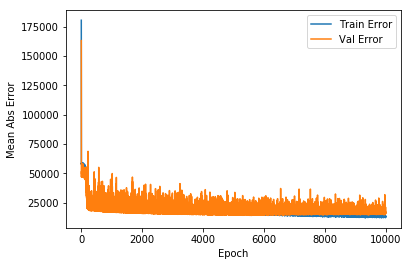

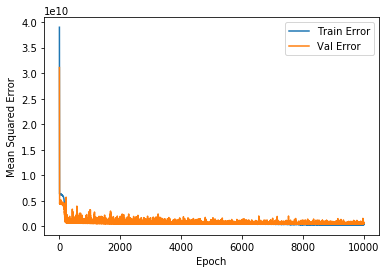

In [39]:
plot_history(history)

In [41]:
kFold = KFold(n_splits=5, random_state=0, shuffle=True)
maes = []
mses = []

for i, (train_idx, test_idx) in enumerate(kFold.split(X, y)):
    print("Fold:", i)
    X_trainCV, X_testCV = X.iloc[train_idx], X.iloc[test_idx]
    y_trainCV, y_testCV = y.iloc[train_idx], y.iloc[test_idx]
    
    modelNN = build_model()
    modelNN.fit(X_trainCV.as_matrix(), 
                y_trainCV.as_matrix(), 
                epochs=20000, 
                verbose=0)
    _, mae, mse = modelNN.evaluate(X_testCV.as_matrix(), y_testCV.as_matrix())
    maes.append(mae)
    mses.append(mse)
    print()
print("Mean MAE:", np.mean(maes))
print("Mean MSE:", np.mean(mses))

Fold: 0


/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


10/10 [==============================] - 0s 2ms/step - mae: 19020.7988 - mse: 1512124416.0000 - loss: 1512124416.0000


/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app



Fold: 1
10/10 [==============================] - 0s 2ms/step - mae: 15575.8115 - mse: 532177120.0000 - loss: 532177120.0000

Fold: 2
10/10 [==============================] - 0s 1ms/step - mae: 18806.2578 - mse: 848077888.0000 - loss: 848077888.0000

Fold: 3
10/10 [==============================] - 0s 1ms/step - mae: 17109.4688 - mse: 728833472.0000 - loss: 728833472.0000

Fold: 4
10/10 [==============================] - 0s 720us/step - mae: 16972.8164 - mse: 643716288.0000 - loss: 643716288.0000

Mean MAE: 17497.0306640625
Mean MSE: 852985836.8


## Let's work with the test set now

In [196]:
housing_test = pd.read_csv('datasets/housing_prices/test.csv')

In [197]:
housing_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [198]:
ids = housing_test['Id']
housing_test.drop(['Id'], inplace=True, axis=1)

### Let's repeat all trans on the test set

In [174]:
missing_val_count_by_column = (housing_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [199]:
cat_columns = housing_test.select_dtypes(include='object').columns
num_columns = housing_test.select_dtypes(exclude='object').columns

In [200]:
mv_cols = (housing_test[num_columns].isnull().sum())
print(mv_cols[mv_cols > 0])

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


In [201]:
housing_test[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1232.000000,1444.000000,1381.000000
mean,68.580357,100.709141,1977.721217
std,22.376841,177.625900,26.431175
min,21.000000,0.000000,1895.000000
25%,58.000000,0.000000,1959.000000
50%,67.000000,0.000000,1979.000000
75%,80.000000,164.000000,2002.000000
max,200.000000,1290.000000,2207.000000


In [178]:
housing_test['MasVnrArea'].mode()

0    0.0
dtype: float64

In [202]:
indices = housing_test[housing_test['MasVnrArea'].isnull()].index

In [203]:
for idx in indices:
    housing_test.at[idx, 'MasVnrArea'] = 0.0

#### Imputing LotFrontage and GarageYrBlt

In [204]:
housing_test['LotFrontage'] = lotFrontageImputer.transform(housing_test['LotFrontage'].values.reshape(-1, 1))
housing_test['GarageYrBlt'] = garageYrBltImputer.transform(housing_test['GarageYrBlt'].values.reshape(-1, 1))

#### Let's impute the remaining (num) cols

In [205]:
numColsImputer = SimpleImputer(strategy='median')
housing_test[num_columns] = numColsImputer.fit_transform(housing_test[num_columns])

In [206]:
mv_cols = (housing_test[num_columns].isnull().sum())
print(mv_cols[mv_cols > 0])

Series([], dtype: int64)


### Let's impute cat cols

In [207]:
mv_cols = (housing_test[cal_columns].isnull().sum())
print(mv_cols[mv_cols > 0])

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [185]:
housing_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [208]:
housing_test['MSZoning'] = housing_test['MSZoning'].fillna('RL')

In [209]:
housing_test[['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
       'GarageFinish','GarageQual','GarageCond','PoolQC','Fence',
       'MiscFeature']] = housing_test[['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
        'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
       'GarageFinish','GarageQual','GarageCond','PoolQC','Fence',
       'MiscFeature']].fillna('NA')

In [210]:
catColsImputer = SimpleImputer(strategy='most_frequent')
housing_test[cat_columns] = catColsImputer.fit_transform(housing_test[cat_columns])

In [211]:
mv_cols = (housing_test[cal_columns].isnull().sum())
print(mv_cols[mv_cols > 0])

Series([], dtype: int64)


### Apply feat transformations

In [212]:
missing_val_count_by_column = (housing_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [213]:
housing_test[cat_columns] = countEncoder.transform(housing_test[cat_columns])

In [214]:
housing_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,16,80.0,11622.0,1454,1369,925,1311,1459,1052,...,120.0,0.0,1453,157,1406,0.0,6.0,2010.0,1267,1198
1,20.0,1151,81.0,14267.0,1454,1369,484,1311,1459,263,...,0.0,0.0,1453,1179,2,12500.0,6.0,2010.0,1267,1198
2,60.0,1151,74.0,13830.0,1454,1369,484,1311,1459,1052,...,0.0,0.0,1453,157,1406,0.0,3.0,2010.0,1267,1198
3,60.0,1151,78.0,9978.0,1454,1369,484,1311,1459,1052,...,0.0,0.0,1453,1179,1406,0.0,6.0,2010.0,1267,1198
4,120.0,1151,43.0,5005.0,1454,1369,484,50,1459,1052,...,144.0,0.0,1453,1179,1406,0.0,1.0,2010.0,1267,1198


In [215]:
cols2scale = ['LotFrontage','LotArea',
              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
              'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
              'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
              'EnclosedPorch','3SsnPorch','ScreenPorch'
             ]
cols2labelencode = ['MSSubClass']

In [216]:
total2scale = [*cat_columns, *cols2scale]

In [217]:
housing_test[total2scale] = numScaler.transform(housing_test[total2scale])

In [ ]:
#### throws the following error: y contains previously unseen labels: [150.0]!!
### this is because that value wasnt seen when fitting the encoder! :(
housing_test['MSSubClass'] = labelEncoder.transform(housing_test['MSSubClass'].values.reshape(-1, 1))

In [220]:
housing_test[housing_test['MSSubClass'] == 150.0]
#### you cant drop the row!! not in the test set

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1358,150.0,1.0,0.164384,0.00187,1.0,1.0,1.0,0.01098,1.0,1.0,...,0.416667,0.0,1.0,1.0,1.0,0.0,4.0,2006.0,1.0,1.0


In [221]:
housing_test['MSSubClass'].value_counts()

20.0     543
60.0     276
50.0     143
120.0     95
30.0      70
70.0      68
160.0     65
80.0      60
90.0      57
190.0     31
85.0      28
75.0       7
180.0      7
45.0       6
40.0       2
150.0      1
Name: MSSubClass, dtype: int64

In [222]:
### impute 160
housing_test.at[1358, 'MSSubClass'] = 160.0

In [223]:
#### give it another try!
housing_test['MSSubClass'] = labelEncoder.transform(housing_test['MSSubClass'].values.reshape(-1, 1))

/home/hernandezurbina/Dev/dltf/tf/lib/python3.5/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [224]:
housing_test['MSSubClass'].value_counts()

0     543
5     276
4     143
11     95
1      70
6      68
12     66
8      60
10     57
14     31
9      28
13      7
7       7
3       6
2       2
Name: MSSubClass, dtype: int64

In [227]:
housing_test.drop(['PoolArea', 'MiscVal'], axis=1, inplace=True)

In [228]:
housing_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,0,0.005259,0.202055,0.048246,1.0,1.0,1.000000,1.00000,1.0,1.000000,...,0.0,0.0,0.25,1.0,0.125,1.000000,6.0,2010.0,1.0,1.0
1,0,1.000000,0.205479,0.060609,1.0,1.0,0.518033,1.00000,1.0,0.247137,...,0.0,0.0,0.00,1.0,1.000,0.000712,6.0,2010.0,1.0,1.0
2,5,1.000000,0.181507,0.058566,1.0,1.0,0.518033,1.00000,1.0,1.000000,...,0.0,0.0,0.00,1.0,0.125,1.000000,3.0,2010.0,1.0,1.0
3,5,1.000000,0.195205,0.040562,1.0,1.0,0.518033,1.00000,1.0,1.000000,...,0.0,0.0,0.00,1.0,1.000,1.000000,6.0,2010.0,1.0,1.0
4,11,1.000000,0.075342,0.017318,1.0,1.0,0.518033,0.01098,1.0,1.000000,...,0.0,0.0,0.30,1.0,1.000,1.000000,1.0,2010.0,1.0,1.0


#### Models to run:
- RF
- XGB
- NN

In [233]:
preds = modelRF.predict(housing_test)
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})

In [234]:
output.head()

,Id,SalePrice
0,1461,126971.82
1,1462,154379.00
2,1463,175946.40
3,1464,185822.80
4,1465,193122.00


In [235]:
output.to_csv('results/housingprices_RF.csv', index=False)

In [236]:
preds = modelXGB.predict(housing_test)
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})
output.to_csv('results/housingprices_XGB.csv', index=False)

In [246]:
preds = modelNN.predict(housing_test)
print(preds[:10])

[[116436.53]
 [166856.02]
 [193154.77]
 [192963.62]
 [195050.78]
 [187105.97]
 [179425.64]
 [184100.83]
 [182361.55]
 [126772.5 ]]


In [243]:
preds = [pred[0] for pred in preds]

In [244]:
output = pd.DataFrame({'Id': ids, 'SalePrice': preds})
output.to_csv('results/housingprices_NN.csv', index=False)

In [245]:
output.head()

,Id,SalePrice
0,1461,116436.531250
1,1462,166856.015625
2,1463,193154.765625
3,1464,192963.625000
4,1465,195050.781250


### At this point you should submit the files generated to Kaggle!